<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/Copy_of_Time_Series_Day_3_Morning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Decomposition & Analysis Assignment

In [ ]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import the monthly sunspots data set into a Pandas dataframe, and convert the Month field to a datetime data type.

In [ ]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%203/monthly-sunspots.csv')

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


### Use a line chart to plot the time series.

In [ ]:
def ilinechart(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, 
                  template='none').update(layout=dict(title=dict(x=0.5)))
    
    fig.show()

In [ ]:
ilinechart(data, 'Month', 'Sunspots', title='Sunspots by Month')

### Decompose the time series and add columns for the trend, seasonality, and residuals to the data set.

In [ ]:
series = data.set_index('Month')
decomposition = sm.tsa.seasonal_decompose(series, model='additive', freq=11*12)

trend = decomposition.trend.reset_index()
seasonality = decomposition.seasonal.reset_index()
residuals = decomposition.resid.reset_index()

merged = data.merge(trend, on='Month')
merged = merged.merge(seasonality, on='Month')
merged = merged.merge(residuals, on='Month')
merged.columns = ['Month', 'Observed', 'Trend', 'Seasonality', 'Residuals']
merged.head()

,Month,Observed,Trend,Seasonality,Residuals
0,1749-01-01,58.0,NaN,21.159749,NaN
1,1749-02-01,62.6,NaN,22.168707,NaN
2,1749-03-01,70.0,NaN,24.953612,NaN
3,1749-04-01,55.7,NaN,27.488196,NaN
4,1749-05-01,85.0,NaN,31.781605,NaN


### Plot the observed values, trend, seasonality, and residuals on a multi-line chart. You should have a line for each column.

**Hint:** You may need to melt the data so that all the categories are in a single column and all the values are in a single column.

In [ ]:
melted = pd.melt(merged, id_vars='Month', value_vars=['Observed', 'Trend', 'Seasonality', 'Residuals'], 
                 var_name='Variable', value_name='Value')

In [ ]:
melted.head()

,Month,Variable,Value
0,1749-01-01,Observed,58.0
1,1749-02-01,Observed,62.6
2,1749-03-01,Observed,70.0
3,1749-04-01,Observed,55.7
4,1749-05-01,Observed,85.0


In [ ]:
ilinechart(melted, 'Month', 'Value', groups='Variable', title='Observed vs. Components')

### Add two columns to the data set - one that calculates a rolling mean and another that calculates a rolling standard deviation.

In [ ]:
merged['Rolling_Mean'] = merged['Observed'].rolling(window=12).mean()
merged['Rolling_Std'] = merged['Observed'].rolling(window=12).std()

### Plot the rolling mean and standard deviation on a multi-line chart along with the observed values.

In [ ]:
rolling = pd.melt(merged, id_vars='Month', 
                  value_vars=['Observed', 'Rolling_Mean', 'Rolling_Std'], 
                  var_name='Variable', value_name='Value')

In [ ]:
ilinechart(rolling, 'Month', 'Value', groups='Variable', title='Rolling Mean & Standard Deviation')

### Perform an Augmented Dickey Fuller Test on the data set and determine whether this time series is stationary.

In [ ]:
adf_test = sm.tsa.stattools.adfuller(merged['Observed'])

results = pd.Series(adf_test[0:4], 
                    index=['ADF Test Statistic','P-Value',
                           '# Lags Used','# Observations Used'])

for key,value in adf_test[4].items():
    results['Critical Value (%s)'%key] = value

print('Augmented Dickey-Fuller Test Results:\n')
print(results)

# null hypothesis: data is not stationary

Augmented Dickey-Fuller Test Results:

ADF Test Statistic     -9.567668e+00
P-Value                 2.333452e-16
# Lags Used             2.700000e+01
# Observations Used     2.792000e+03
Critical Value (1%)    -3.432694e+00
Critical Value (5%)    -2.862576e+00
Critical Value (10%)   -2.567321e+00
dtype: float64


### Generate an autocorrelation plot for the data set to determine the level of autocorrelation in this time series.

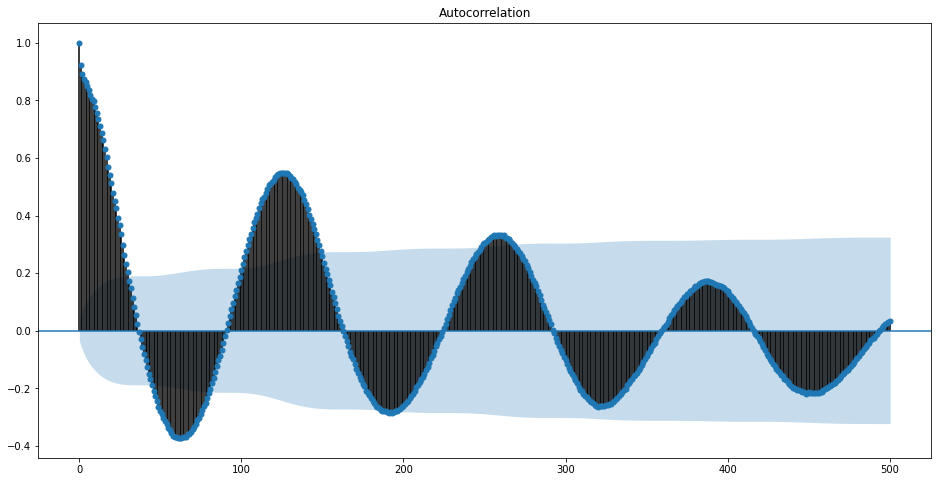

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

series = data.set_index('Month')
fig = plot_acf(series, lags=500)